In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
pd.set_option('display.width', 200)
pd.set_option('display.max_columns', None)

## EDA

- customerID : Customer ID
- gender : Whether the customer is a male or a female
- SeniorCitizen : Whether the customer is a senior citizen or not (1, 0)
- Partner : Whether the customer has a partner or not (Yes, No)
- Dependents : Whether the customer has dependents or not (Yes, No)
- tenure : Number of months the customer has stayed with the company
- PhoneService : Whether the customer has a phone service or not (Yes, No)
- MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService : Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity : Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup : Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection : Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport : Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV : Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies : Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract : The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling : Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges : The amount charged to the customer monthly
- TotalCharges : The total amount charged to the customer
- Churn : Whether the customer churned or not (Yes or No)

### 기본 분포 확인

In [21]:
# https://www.kaggle.com/datasets/blastchar/telco-customer-churn
df_raw = pd.read_csv("../data/Telco-Customer-Churn.csv")
df_raw.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
# 결측치 없음
df_raw.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [17]:
# Yes, No로 되어 있는 Target feature Churn을 1, 0 으로 인코딩
df1 = df_raw.copy()
df1['Churn'] = df1['Churn'].replace({'Yes':1, "No":0})

In [18]:
# object인 TotalCharges를 float으로 변경
# "" 으로 처리된 칸이 있음
df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'], errors='coerce')
df1['TotalCharges'] = df1['TotalCharges'].replace(np.nan, 0)

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- 이탈 고객 비율뿐만 아니라 이탈로 인한 손해도 확인
- Churn * MonthlyCharges 한 Loss 컬럼 생성

In [22]:
df1['Loss'] = df['Churn'] * df['MonthlyCharges']
df1['Loss']

0        0.00
1        0.00
2       53.85
3        0.00
4       70.70
        ...  
7038     0.00
7039     0.00
7040     0.00
7041    74.40
7042     0.00
Name: Loss, Length: 7043, dtype: float64

In [25]:
df1['Loss'].sum()

139130.84999999998

- 연속형 변수 : tenure, MonthlyCharges, TotalCharges, Loss
- 범주형 변수 : 나머지
    - 고객의 demographics인 gender, SeniorCitizen, Partner, Dependents
    - 고객이 가입한 서비스와 관련된 PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies
    - 요금 납부와 관련된 Contract, PaperlessBilling, PaymentMethod
    - CustomerID는 고객마다 부여된 고유의 id로 분석에 유의미할 것 같지 않음

### Target Variable : Churn
- 전체 Churn 고개 1869명
- Churn 아닌 고객과 Churn인 고객의 비율 = 73 : 27

In [23]:
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

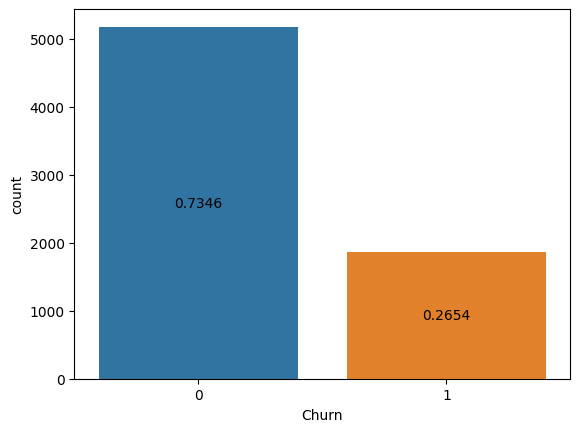

In [24]:
ax = sns.countplot(data=df, x='Churn')
ax.bar_label(ax.containers[0],
             labels=[f"{x:.4f}" for x in [1-df['Churn'].mean(), df['Churn'].mean()]],
             label_type='center')
plt.show()

### 범주형 변수 EDA 용 함수 정의

In [91]:
def eda_cat(col) :
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
    axes[0].set_title(f"Number of customers by {col}")
    cnt = sns.countplot(data=df1, x=col, ax=axes[0],
                       order=sorted(df1[col].unique()))
    cnt.bar_label(cnt.containers[0],
                 labels=[f"{x*100/len(df1):.2f}%" for x in df1[col].value_counts().sort_index()],
                 label_type='center')
    axes[1].set_title(f"Churn ratio by {col}")
    by_churn = sns.barplot(data=df1, x=col, y='Churn', ax=axes[1],
                           order=sorted(df1[col].unique()))
    by_churn.bar_label(by_churn.containers[0],
                       labels=[f"{x*100:.2f}%" for x in df1.groupby(col)['Churn'].mean()],
                       label_type='center')
    loss = plt.pie(df1.groupby(col)['Loss'].sum(),
                   labels=sorted(df1[col].unique()),
                   autopct='%1.2f%%')
    axes[2].set_title(f"Churn loss by {col}")
    plt.show()

### Demographics

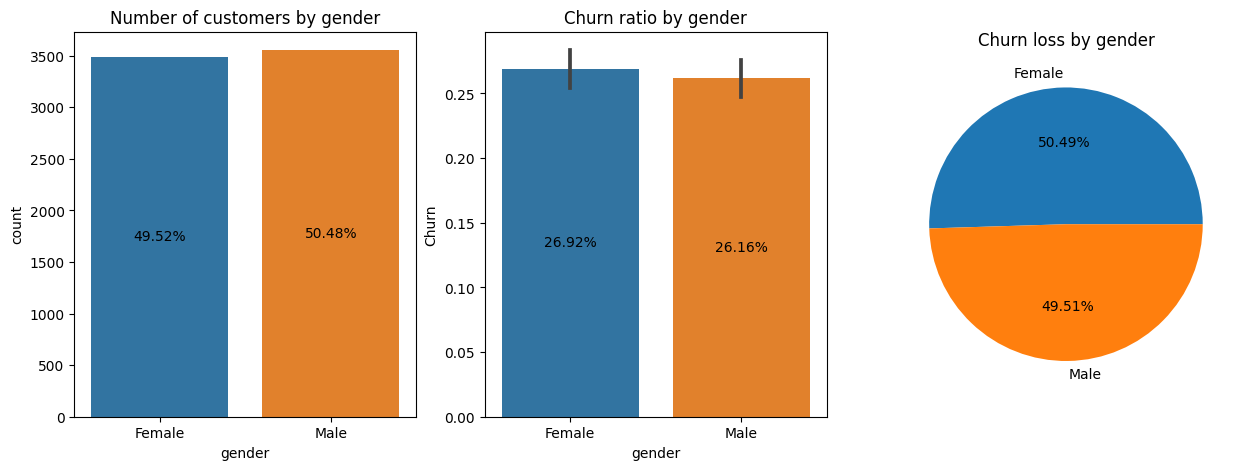

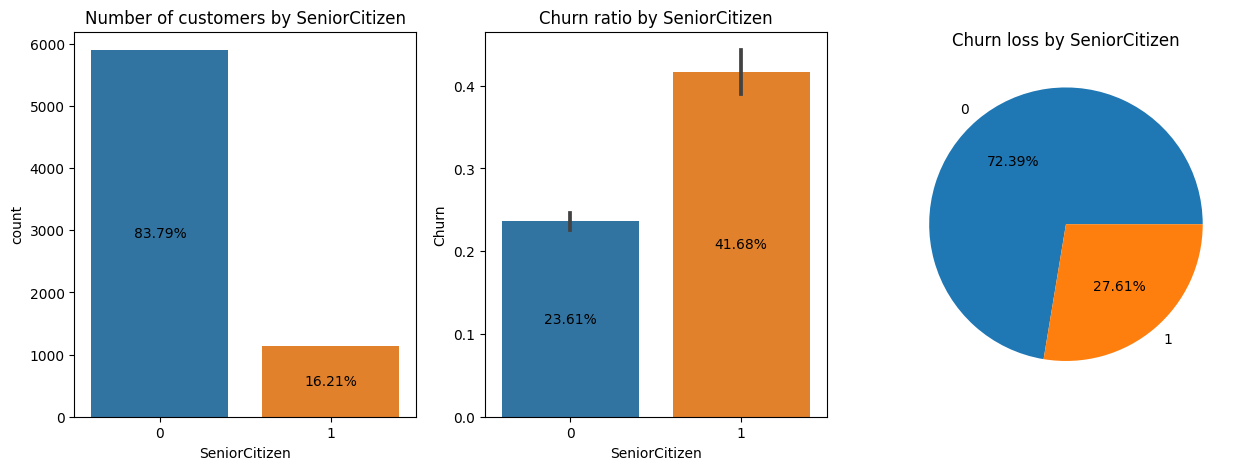

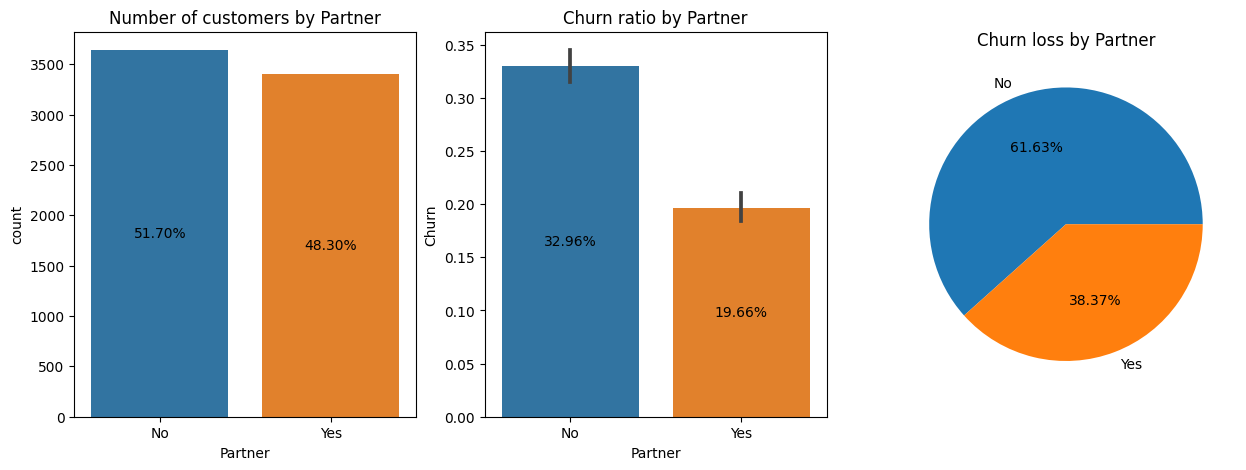

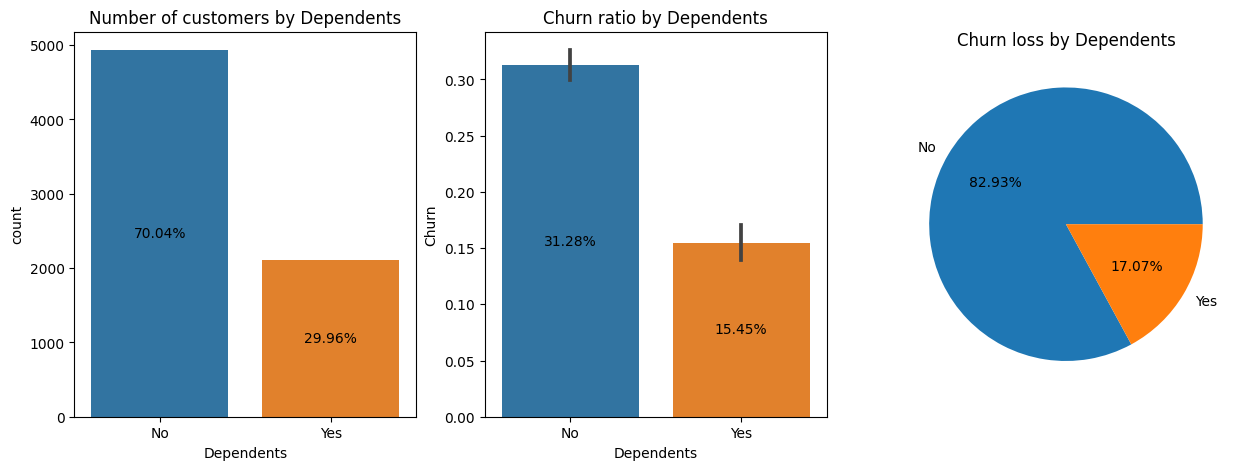

In [92]:
demographics = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
for feature in demographics :
    eda_cat(feature)

#### gender
- 여성 고객 50%, Churn 비율 27%
- 남성 고객 50%, Churn 비율 26%
- 여성 고객의 Churn 비율이 약간 더 높지만 거의 차이 없음

#### SeniorCitizen
- 노인 고객 16%, Churn 비율 42%
- 노인 아닌 고객 84%, Churn 비율 24% 
- 노인 고객의 Churn 비율이 더 높음

#### Partner
- 배우자가 없는 고객 52%, Churn 비율 33%
- 배우자가 있는 고객 48%, Churn 비율 20%
- 배우자가 없는 고객의 Churn 비율이 더 높음

#### Dependents
- 피부양자가 있는 고객 30%, Churn 비율 15%
- 피부양자가 없는 고객 70%, Churn 비율 31%
- 피부양자가 없는 고객의 Churn 비율이 더 높음
- 피부양자가 없는 고객은 전체 고객 중 비중도 높고, Churn 비율도 높아서 주목할 고객군

#### Dependents & Partner
- 피부양자가 없고 배우자가 없는 고객 중 Churn 고객은 1123명
- 전체 Churn 고객 1869명 중 60% 차지

                    Churn
Dependents Partner       
No         No        1123
           Yes        420
Yes        No          77
           Yes        249


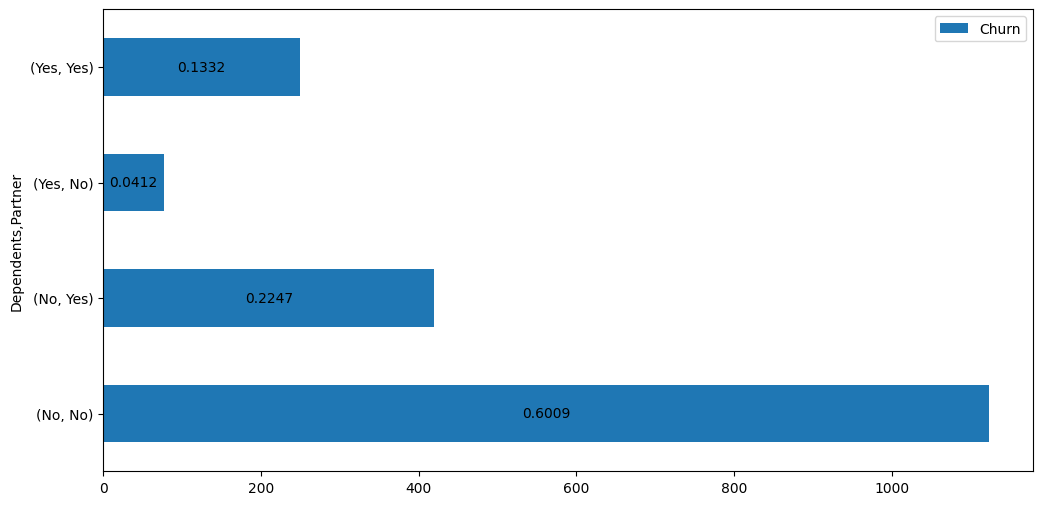

In [109]:
df_demo = pd.DataFrame(df[df['Churn']==1].groupby(['Dependents', 'Partner'])['Churn'].value_counts())
df_demo.index = df_demo.index.droplevel(2)
ax = df_demo.plot(kind='barh', figsize=(12, 6))
ax.bar_label(ax.containers[0],
             labels=[f"{x/1869:.4f}" for x in df_demo['Churn'].values],
             label_type='center')
print(df_demo)
plt.show()

### 가입한 서비스

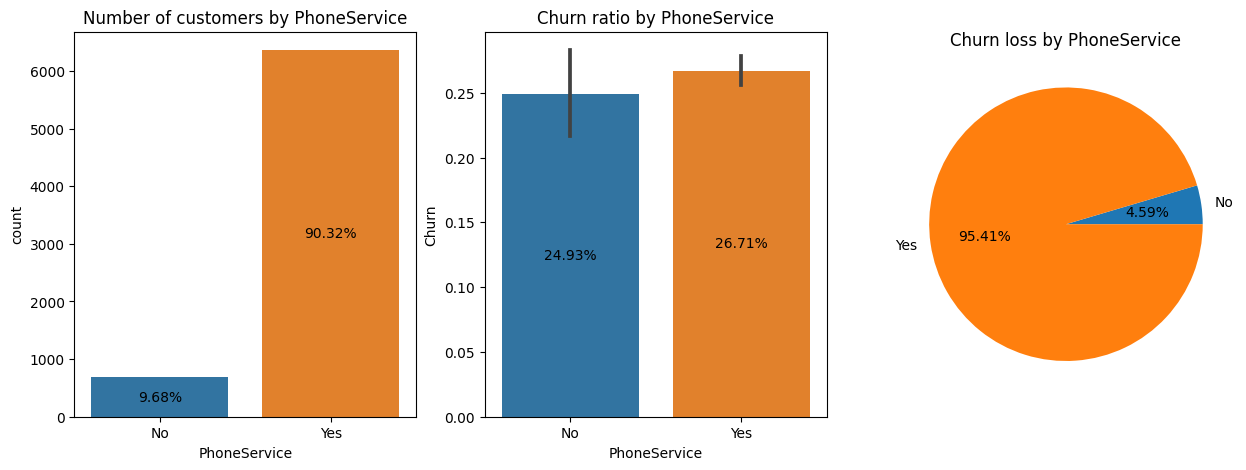

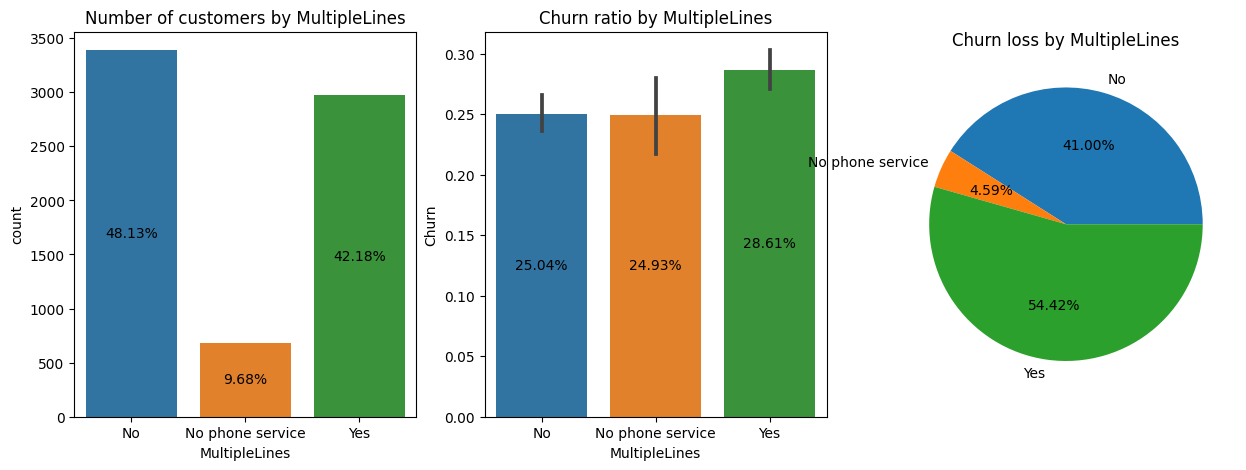

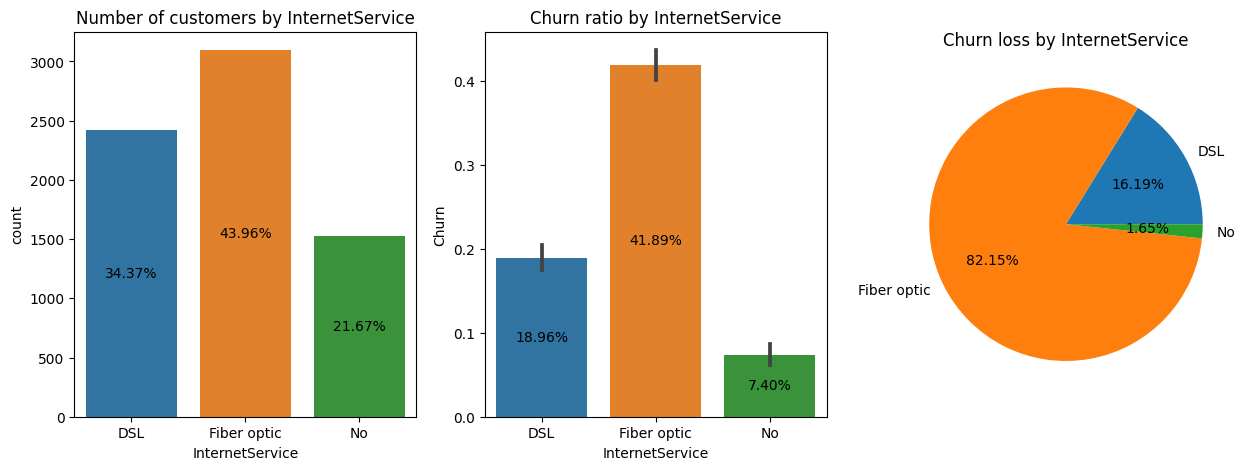

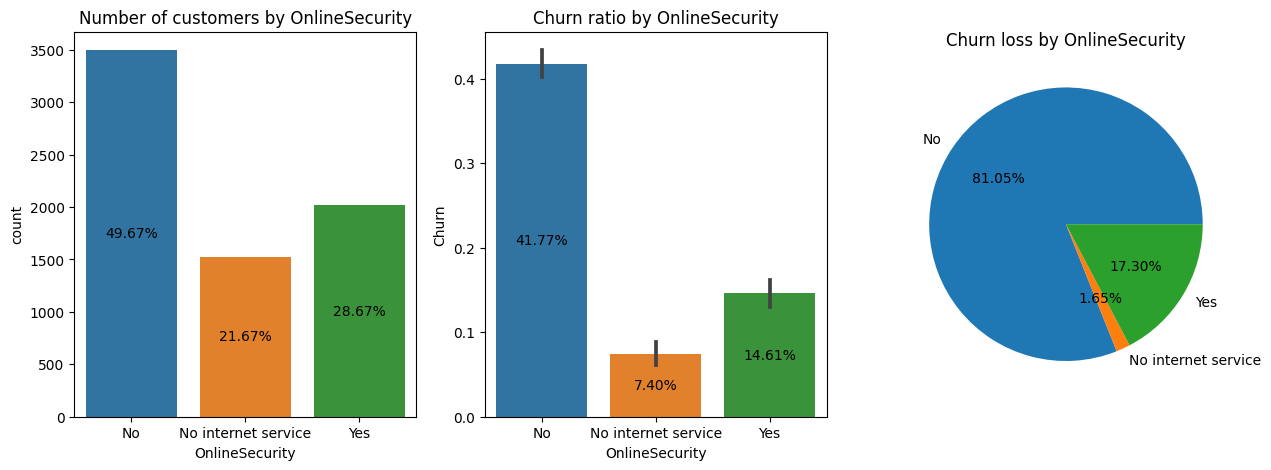

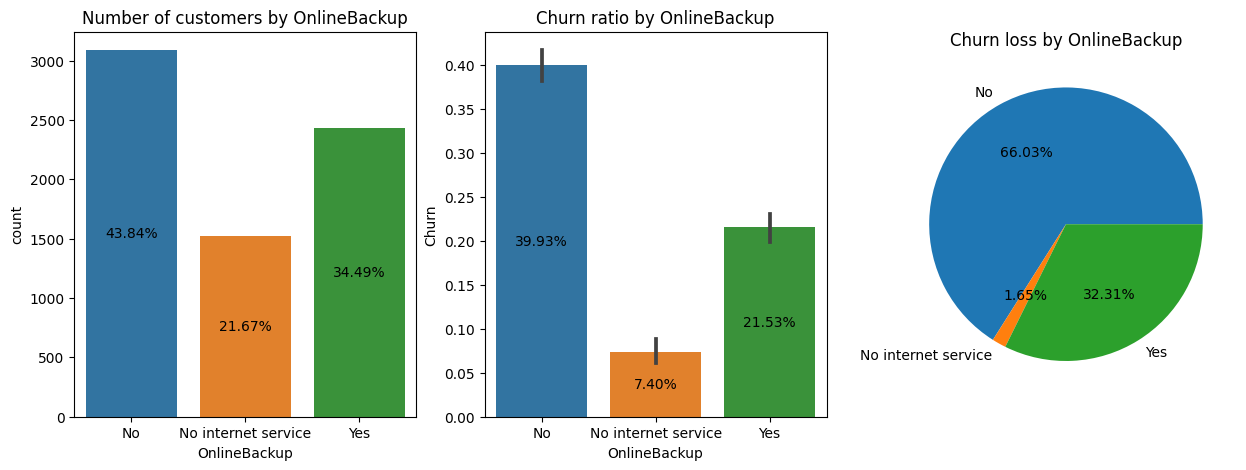

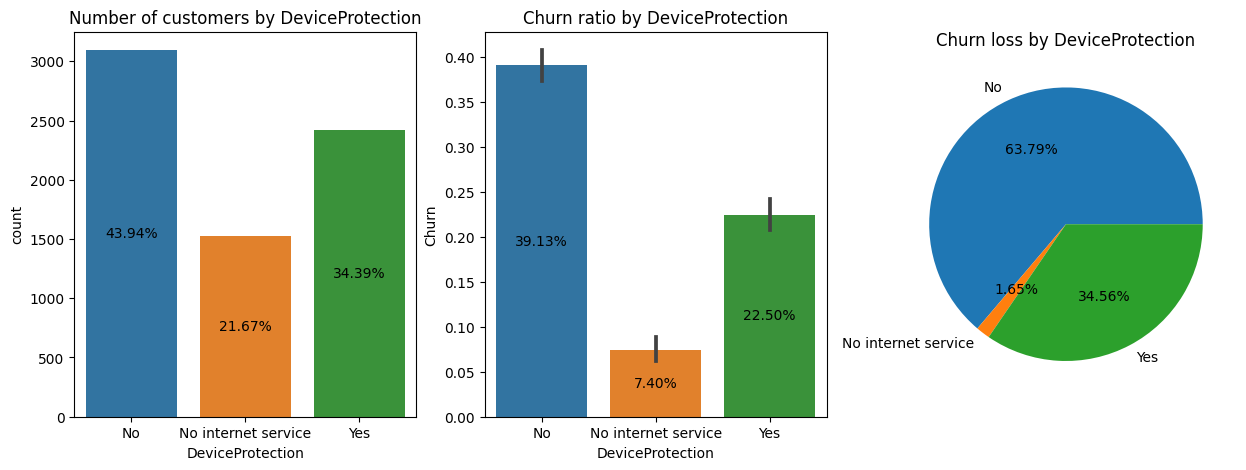

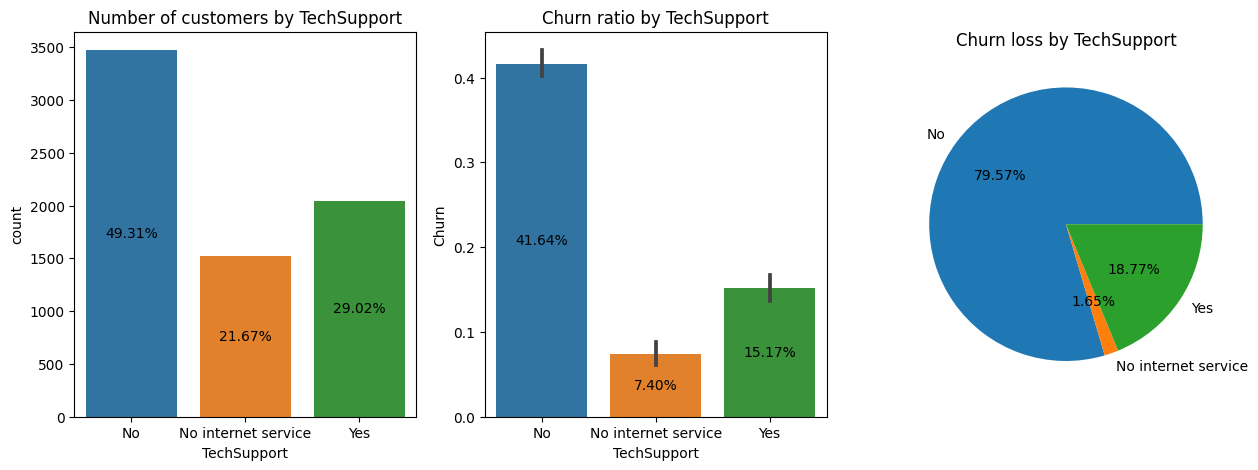

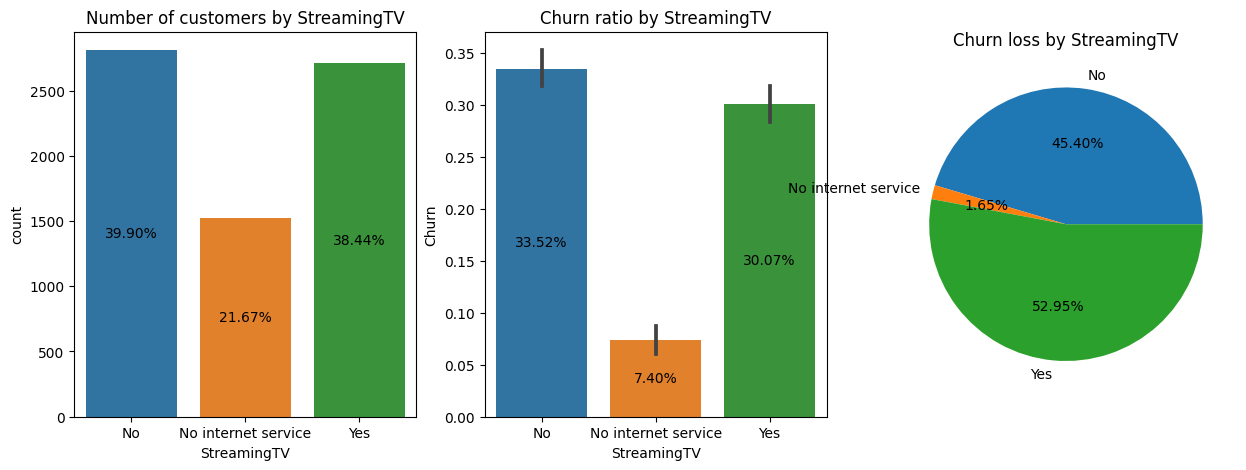

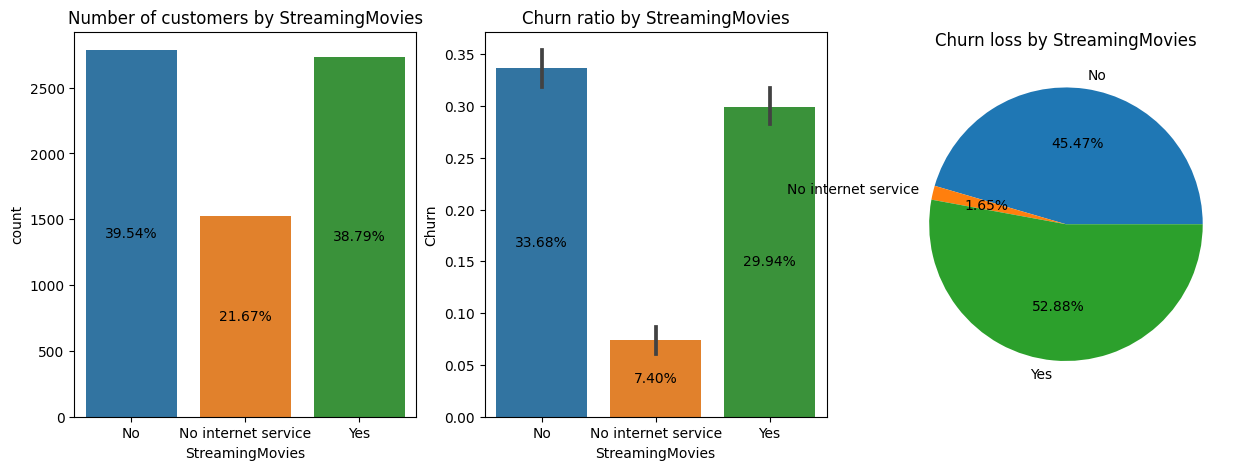

In [93]:
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for feature in services :
    eda_cat(feature)

#### PhoneService
- 전화 서비스에 가입한 고객 90%, Churn 비율 27%
- 전화 서비스에 가입하지 않은 고객 10%, Churn 비율 25%
- 전화 서비스에 가입한 고객의 Churn 비율이 약간 더 높음

#### MultipleLines
- 다중회선 가입한 고객 42%, Churn 비율 29%
- 다중회선 미가입 고객 48%, Churn 비율 25%
- 전화서비스 자체에 가입하지 않은 고객 PhoneService에서 확인햇듯 10%
- 다중회선 가입한 고객의 Churn 비율이 약간 더 높음

#### InternetService
- 두 종류의 인터넷 서비스가 있음
- DSL(일반 전화선)에 가입한 고객 34%, Churn 비율 19%
- Fiber optic(광케이블)에 가입한 고객 44%, Churn 비율 42%
- 인터넷 서비스에 가입하지 않은 고객 22%, Churn 비율 7%
    - 이후 인터넷서비스와 관련 있는 다른 서비스에서도 이 비율은 동일함
- Fiber optic으로 가입한 고객의 Churn 비율이 가장 높고 그 다음이 DSL, 마지막이 가입하지 않은 고객

#### OnlineSecurity
- 온라인보안 서비스에 가입한 고객 27%, Churn 비율 15%
- 온라인보안 서비스에 가입하지 않은 고객 50%, Churn 비율 42%
- 가입하지 않은 고객의 Churn 비율이 더 높음

#### OnlineBackup
- 온라인 백업 서비스에 가입 고객 34%, Churn 비율 22%
- 온라인 백업 서비스에 가입하지 않은 고객 44%, Churn 비율 40%
- 가입하지 않은 고객의 Churn 비율이 더 높음

#### DeviceProtection
- 장치 보호 서비스에 가입한 고객 34%, Churn 비율 23%
- 장치 보호 서비스에 가입하지 않은 고객 44%, Churn 비율 39%
- 가입하지 않은 고객의 Churn 비율이 더 높음

#### TechSupport
- 기술 지원 서비스에 가입한 고객 29%, Churn 비율 15%
- 기술 지원 서비스에 가입하지 않은 고객 49%, Churn 비율 42%
- 가입하지 않은 고객의 Churn 비율이 더 높음

#### StreamingTV
- TV 스트리밍 서비스에 가입한 고객 38%, Churn 비율 30%
- TV 스트리밍 서비스에 가입하지 않은 고객 40%, Churn 비율 34%
- 가입하지 않은 고객의 Churn 비율이 약간 더 높음

#### StreamingMovies
- 영화 스트리밍 서비스에 가입한 고객 39%, Churn 비율 30%
- 영화 스트리밍 서비스 가입하지 않은 고객 40%, Churn 비율 34%
- 가입하지 않는 고객의 Churn 비율이 약간 더 높음

#### Internet  관련 서비스
- 전반적으로 Internet 관련 서비스에 가입하지 않은 고객의 Churn 비율이 높음
- 특히, Fiber optic에 가입했다면 Churn 비율 더 높음

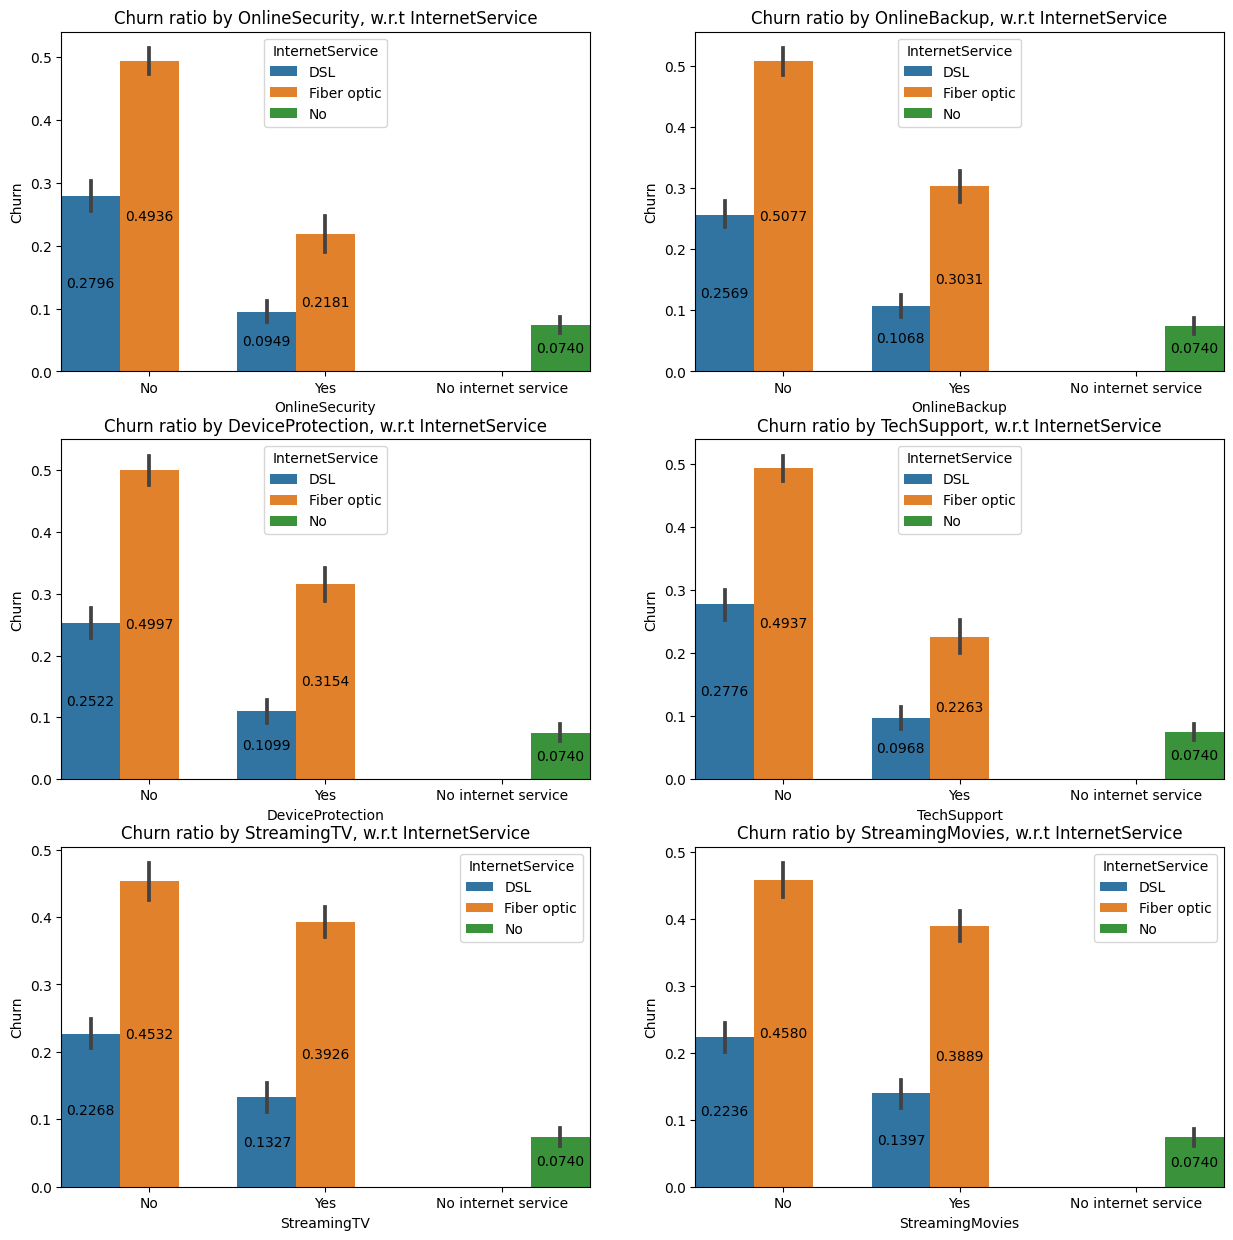

In [89]:
internet_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                     'StreamingTV', 'StreamingMovies']
fig = plt.figure(figsize=(15, 15))
for i in range(3) :
    for j in range(1, 3) :
        feature = internet_services[2*i+j-1]
        ax = fig.add_subplot(320+2*i+j)
        ax = sns.barplot(data=df, x=feature, y='Churn', hue='InternetService',
                         order=["No", "Yes", "No internet service"], width=1)
        ax.set_title(f"Churn ratio by {feature}, w.r.t InternetService")
        for k in range(3) :
            ax.bar_label(ax.containers[k], fmt='%.4f', label_type='center')

### 요금 납부

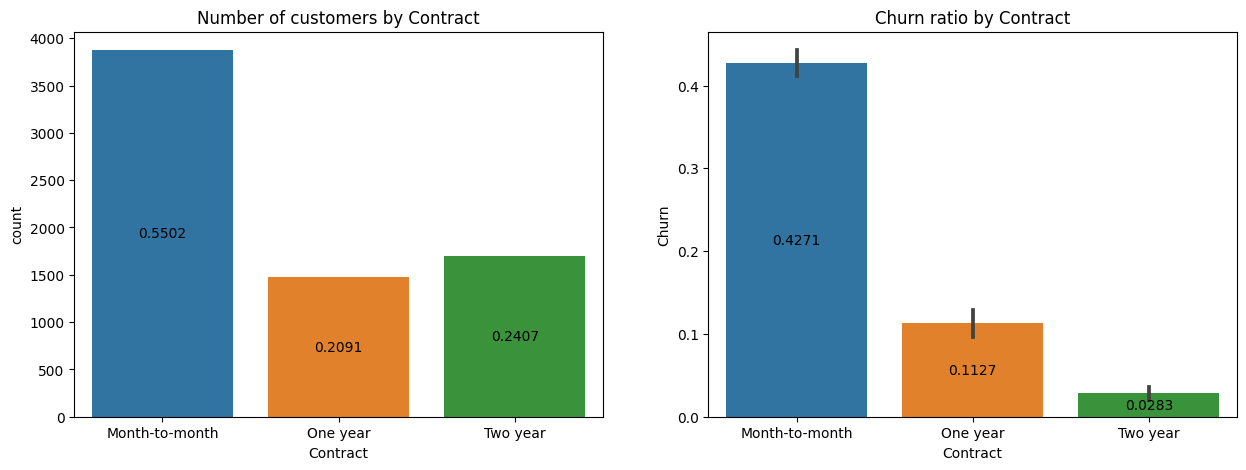

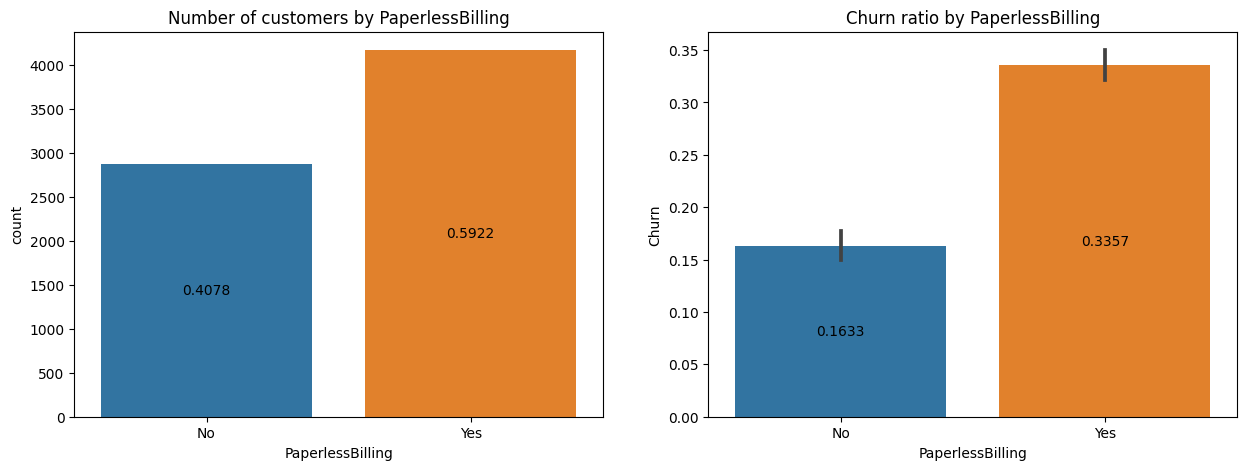

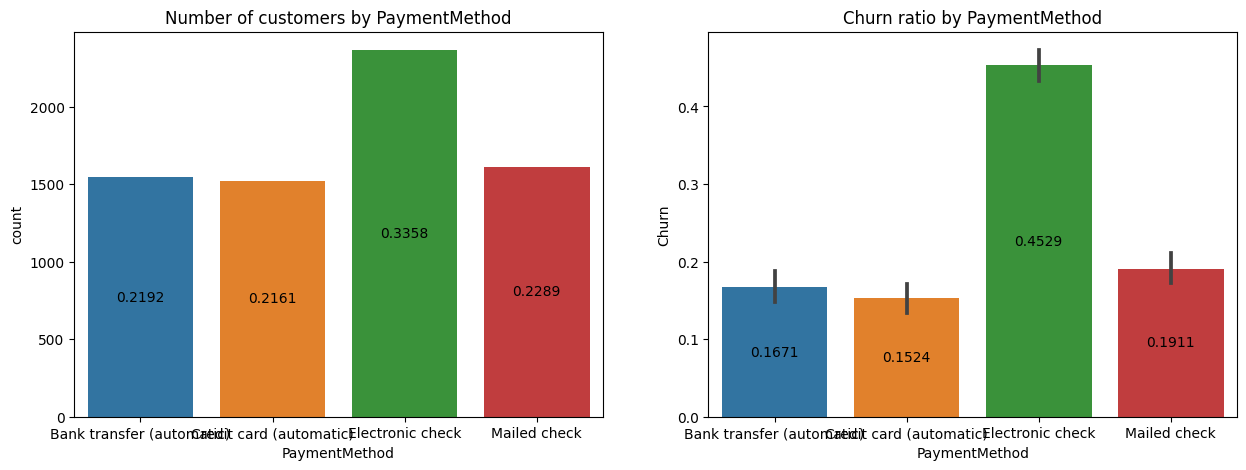

In [38]:
billings = ['Contract', 'PaperlessBilling', 'PaymentMethod']
for feature in billings :
    eda_cat(feature)

#### Contract
- 계약 종류로 3가지 있음
- 매달 계약을 갱신하는 고객 55%, Churn 비율 43%
- 년 단위로 게약을 갱신하는 고객 21%이며, Churn 비율 11%
- 이년 단위로 계약을 갱신하는 고객 24%이며, Churn 비율은 3%
- 갱신 간격이 짧을수록 Churn 비율이 높음

#### PaperlessBilling
- 종이 청구서를 수령하지 않는 고객 약 59%, Churn 비율 36%
- 종이 청구서를 수령하는 고객 약 41%, Churn 비율 16%
- 종이 청구서를 수령하지 않는 고객의 Churn 비율이 더 높음

#### PaymentMethod
- 네가지 요금 납부 방법
- 은행 자동이체 하는 고객 약 22%, Churn비율 17%
- 신용카드로 자동결제 하는 고객 약 22%, Churn 비율 15%
- 전자수표로 납부하는 고객 약 34%, Churn 비율 45%
- 수표를 우편으로 보내서 납부하는 고객 약 23%, Churn 비율 19%
- 전자수표로 납부하는 고객의 Churn 비율이 가장 높고, 다음이 우편 수표, 은행 자동이체, 신용카드 순서

### 범주형 변수간 상관관계

In [129]:
df_solo = df.query('Partner == "No" and Dependents == "No"')

In [131]:
df_solo.groupby('SeniorCitizen')['Churn'].value_counts()

SeniorCitizen  Churn
0              0        1872
               1         847
1              0         285
               1         276
Name: Churn, dtype: int64

In [132]:
df_solo.groupby('SeniorCitizen')['Churn'].mean()

SeniorCitizen
0    0.311512
1    0.491979
Name: Churn, dtype: float64

In [142]:
df_churn = df.query('Churn == 1')

In [146]:
df_churn.groupby(['Partner', 'Dependents', 'SeniorCitizen'])['Churn'].value_counts()

Partner  Dependents  SeniorCitizen  Churn
No       No          0              1        847
                     1              1        276
         Yes         0              1         75
                     1              1          2
Yes      No          0              1        242
                     1              1        178
         Yes         0              1        229
                     1              1         20
Name: Churn, dtype: int64

In [147]:
df_churn.groupby(['Partner', 'Dependents', 'SeniorCitizen', 'InternetService'])['Churn'].value_counts()

Partner  Dependents  SeniorCitizen  InternetService  Churn
No       No          0              DSL              1        243
                                    Fiber optic      1        531
                                    No               1         73
                     1              DSL              1         51
                                    Fiber optic      1        222
                                    No               1          3
         Yes         0              DSL              1         26
                                    Fiber optic      1         41
                                    No               1          8
                     1              DSL              1          1
                                    Fiber optic      1          1
Yes      No          0              DSL              1         48
                                    Fiber optic      1        187
                                    No               1          7
                 

In [110]:
df.groupby(['Partner', 'Dependents'])['Churn'].mean()

Partner  Dependents
No       No            0.342378
         Yes           0.213296
Yes      No            0.254083
         Yes           0.142367
Name: Churn, dtype: float64

In [119]:
df.query('Partner == "No"' and 'Dependents == "No"')['InternetService'].value_counts()

Fiber optic    2434
DSL            1616
No              883
Name: InternetService, dtype: int64

In [122]:
df.query('Partner == "No"' and 'Dependents == "No"')['Churn'].mean()

0.3127914048246503

In [120]:
df.query('Partner == "No"' and 'Dependents == "No"')['SeniorCitizen'].value_counts()

0    3882
1    1051
Name: SeniorCitizen, dtype: int64

In [121]:
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [103]:
df.groupby('SeniorCitizen')['Churn'].mean()

SeniorCitizen
0    0.236062
1    0.416813
Name: Churn, dtype: float64

In [102]:
df.groupby(['SeniorCitizen'])['InternetService'].value_counts(normalize=True, sort=False)

SeniorCitizen  InternetService
0              DSL                0.366379
               Fiber optic        0.383833
               No                 0.249788
1              DSL                0.226795
               Fiber optic        0.727671
               No                 0.045534
Name: InternetService, dtype: float64

In [104]:
df.groupby('SeniorCitizen')['PaperlessBilling'].value_counts(normalize=True, sort=False)

SeniorCitizen  PaperlessBilling
0              No                  0.441620
               Yes                 0.558380
1              No                  0.232925
               Yes                 0.767075
Name: PaperlessBilling, dtype: float64

In [96]:
df.groupby('PaperlessBilling')['InternetService'].value_counts(normalize=True, sort=False)

PaperlessBilling  InternetService
No                DSL                0.379875
                  Fiber optic        0.244081
                  No                 0.376045
Yes               DSL                0.318868
                  Fiber optic        0.574203
                  No                 0.106929
Name: InternetService, dtype: float64

In [105]:
df.groupby('Dependents')['PaperlessBilling'].value_counts(normalize=True, sort=False)

Dependents  PaperlessBilling
No          No                  0.371985
            Yes                 0.628015
Yes         No                  0.491469
            Yes                 0.508531
Name: PaperlessBilling, dtype: float64

In [92]:
df.groupby(['PaymentMethod', 'PaperlessBilling'])['Churn'].mean()

PaymentMethod              PaperlessBilling
Bank transfer (automatic)  No                  0.110260
                           Yes                 0.208754
Credit card (automatic)    No                  0.100000
                           Yes                 0.190476
Electronic check           No                  0.327448
                           Yes                 0.497704
Mailed check               No                  0.134937
                           Yes                 0.272866
Name: Churn, dtype: float64

In [91]:
df.groupby(['PaperlessBilling', 'PaymentMethod'])['Churn'].mean()

PaperlessBilling  PaymentMethod            
No                Bank transfer (automatic)    0.110260
                  Credit card (automatic)      0.100000
                  Electronic check             0.327448
                  Mailed check                 0.134937
Yes               Bank transfer (automatic)    0.208754
                  Credit card (automatic)      0.190476
                  Electronic check             0.497704
                  Mailed check                 0.272866
Name: Churn, dtype: float64